In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the "../input/" directory.



ageage in years
sex(1 = male; 0 = female)
cpchest pain type
trestbpsresting blood pressure (in mm Hg on admission to the hospital)
cholserum cholestoral in mg/dl
fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecgresting electrocardiographic results
thalachmaximum heart rate achieved
exangexercise induced angina (1 = yes; 0 = no)
oldpeakST depression induced by exercise relative to rest
slopethe slope of the peak exercise ST segment
canumber of major vessels (0-3) colored by flourosopy
thal3 = normal; 6 = fixed defect; 7 = reversable defect
target1 or 0

In [63]:
df_raw = pd.read_csv('./input/heart-disease-uci/heart.csv')
df = df_raw.copy(deep=True)
print("Number of samples : %i - Number of features : %i" % (df.shape[0], df.shape[1]))
df.describe()

Number of samples : 303 - Number of features : 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [75]:
def plot_all_vars(df, feat_list=None, nb_row=3, nb_col=5, figsize=(30,10), kde=False):
    if feat_list is None:
        feat_list= list(df.keys())
    assert len(feat_list) <= nb_row*nb_col
    f, axes = plt.subplots(nb_row,nb_col, figsize=(30, 10)) #, sharex=True)
    row=0
    col=0
    for feat in feat_list:
        sns.distplot(df[feat], ax=axes[row,col], kde=kde)
        if col < nb_col-1:
            col +=1
        else :
            col = 0
            row += 1
    plt.show()

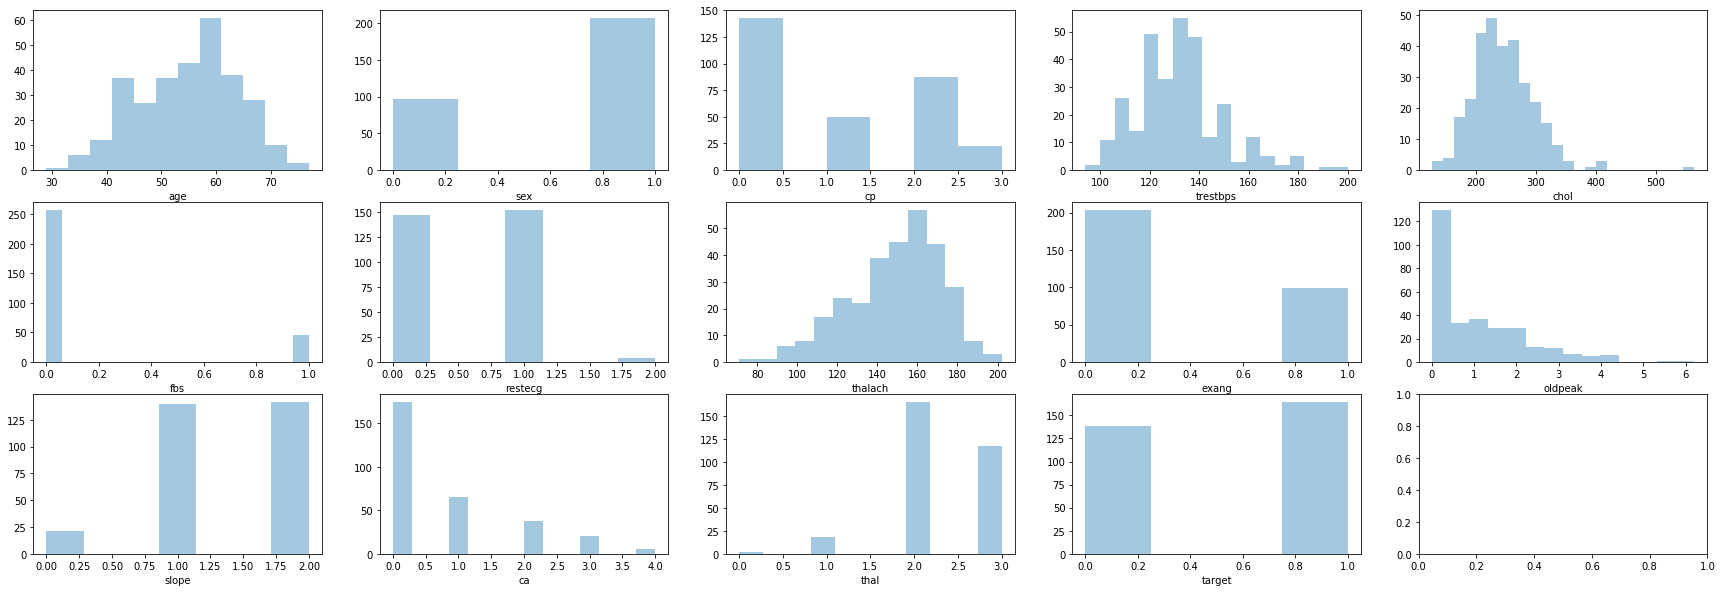

In [66]:
plot_all_vars(df)

In [67]:
target_feature = ['target'] #1 or 0

categorical_features = [ 'sex',    # (1 = male; 0 = female)
                         'cp',    #chest pain types
                         'fbs',  #(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                         'restecg', #resting electrocardiographic results
                         'exang', #exercise induced angina (1 = yes; 0 = no)
                        'slope', #the slope of the peak exercise ST segment
                        'ca', #number of major vessels (0-3) colored by flourosopy
                         'thal'] # 3 = normal; 6 = fixed defect; 7 = reversable defect 


numerical_features = ['age',  #age in years
                         'trestbps', #resting blood pressure 
                      #(in mm Hg on admission to the hospital)
                         'chol', #serum cholestoral in mg/dl
                         'thalach', #maximum heart rate achieved
                         'oldpeak'] #ST depression induced by exercise relative to rest
                         
                         

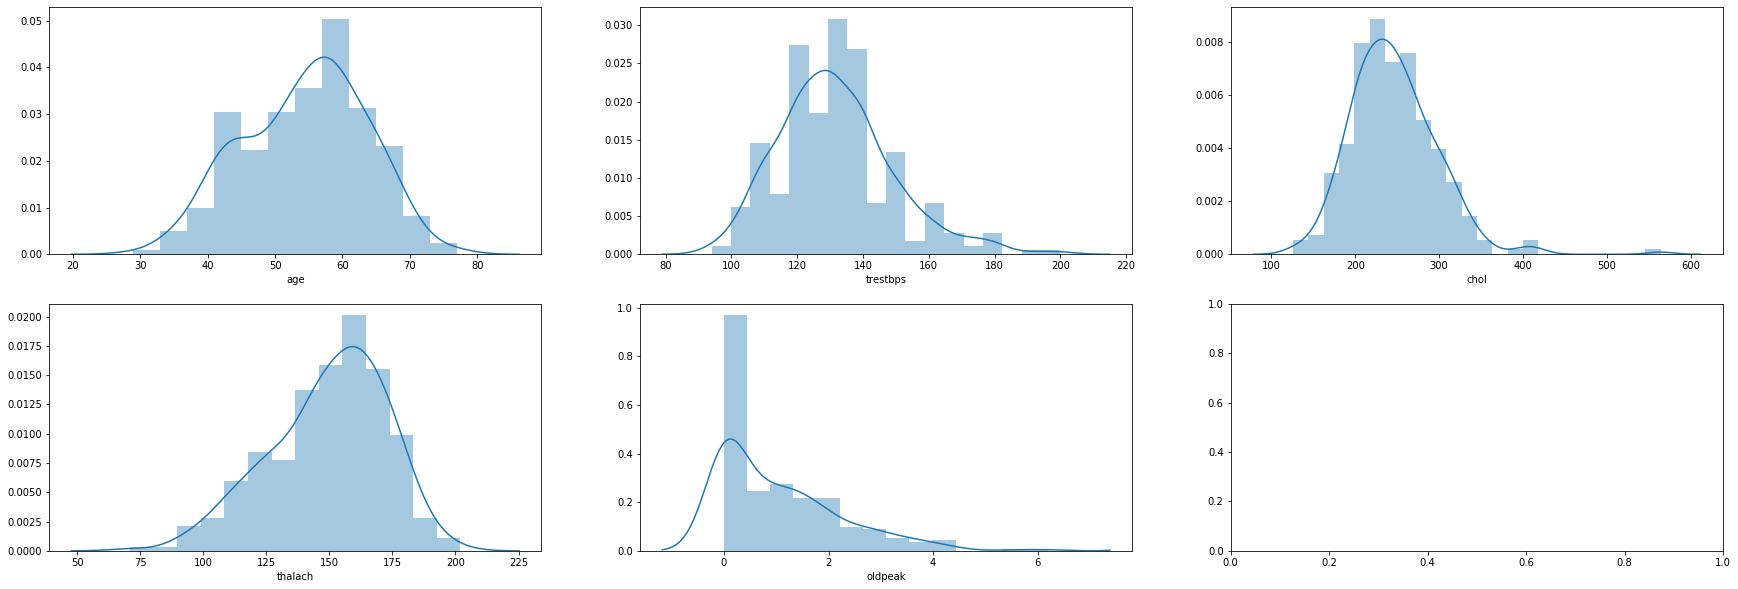

In [81]:
plot_all_vars(df, numerical_features, 2,3, kde=True)

In [69]:
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [70]:
#Tests before Log transformation
numerical_non_zero_features = list(numerical_features)
for feat in numerical_features:
    zero_count = (df[feat]==0).sum()
    if zero_count > 0 :
        print(f"Feature {feat} contains {zero_count} records with value 0")
        numerical_non_zero_features.remove(feat)

Feature oldpeak contains 99 records with value 0


In [71]:
numerical_non_zero_features

['age', 'trestbps', 'chol', 'thalach']

In [72]:
#Log transformation
numerical_log_features = []
for feat in numerical_non_zero_features:
    log_feat_name = f"{feat}_Log"
    numerical_log_features.append(log_feat_name)
    df[log_feat_name]=np.log(df[feat])

In [74]:
numerical_log_features

['age_Log', 'trestbps_Log', 'chol_Log', 'thalach_Log']

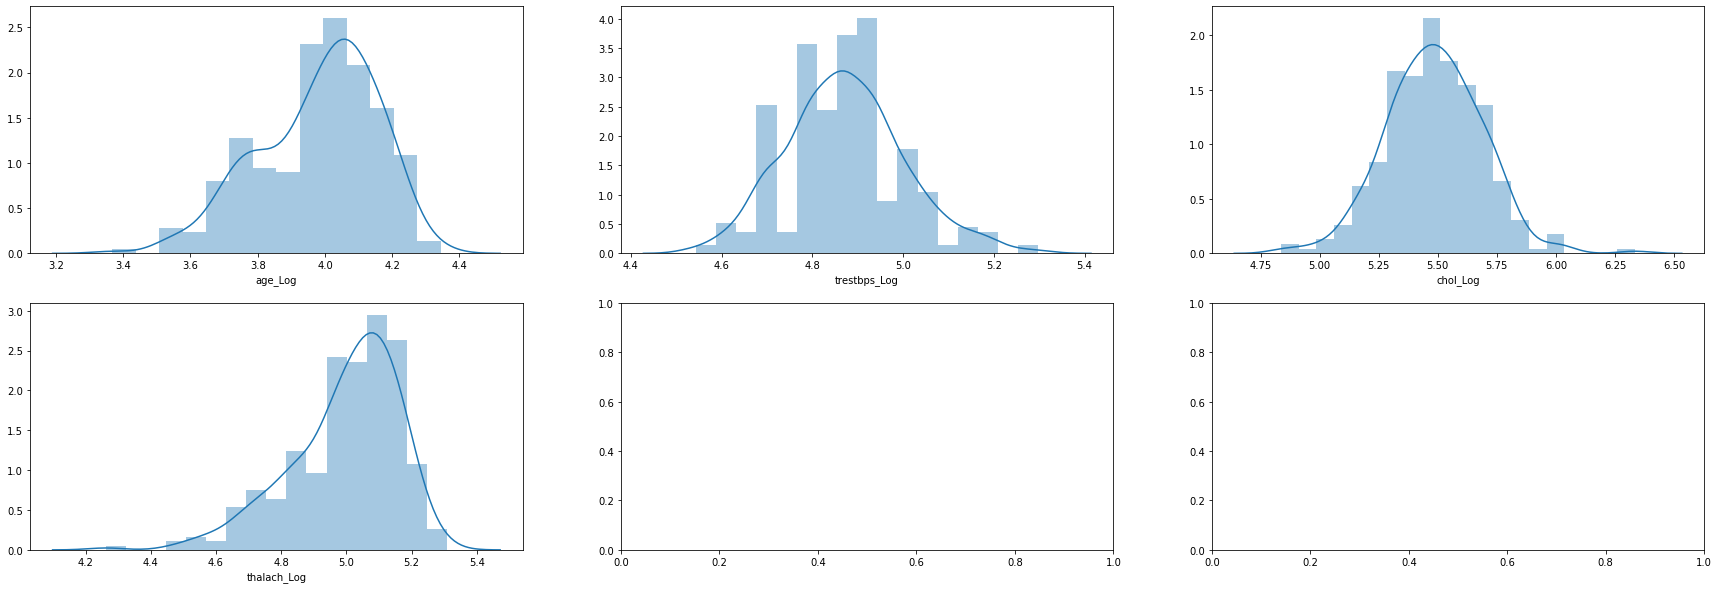

In [80]:
plot_all_vars(df, numerical_log_features, 2,3, kde=True)

In [77]:
#sqrt transformation
numerical_sqrt_features = []
for feat in numerical_features:
    log_feat_name = f"{feat}_Sqrt"
    numerical_sqrt_features.append(log_feat_name)
    df[log_feat_name]=np.sqrt(df[feat])

In [78]:
numerical_sqrt_features

['age_Sqrt', 'trestbps_Sqrt', 'chol_Sqrt', 'thalach_Sqrt', 'oldpeak_Sqrt']

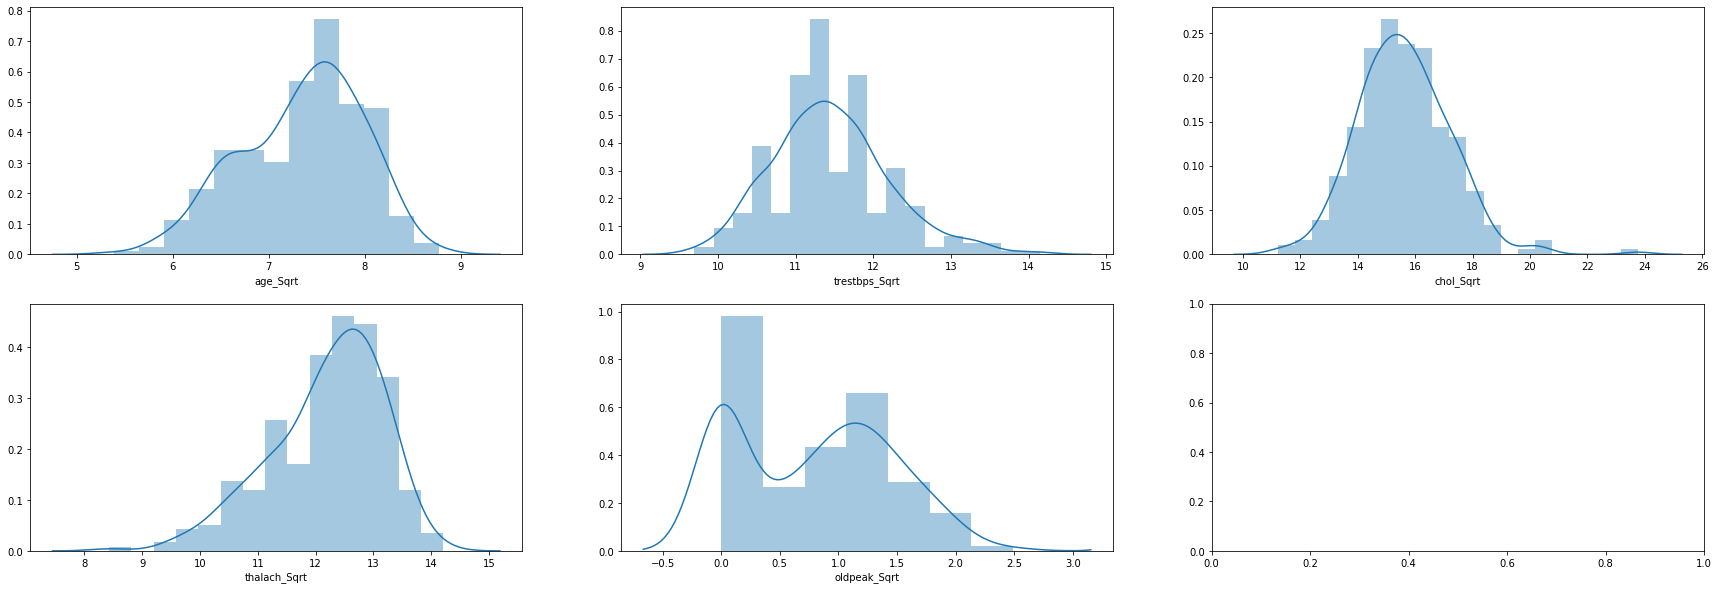

In [79]:
plot_all_vars(df, numerical_sqrt_features, 2,3, kde=True)

# 0. Importing data and first look
Origin of the dataset


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('.'):
    print(dirpath, filenames)

In [ ]:
df = pd.read_csv('.\\input\\heart-disease-uci\\heart.csv')
print("Number of samples : %i - Number of features : %i" % (df.shape[0], df.shape[1]))
df.describe()

In [ ]:
#!pip install qgrid
! jupyter nbextension enable --py --sys-prefix qgrid
import qgrid
# only required if you have not enabled the ipywidgets nbextension yet
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
#to show a df simply use the below:
qgrid.show_grid(df)

## General data quality - missing values
No null values in this -very clean- dataset

In [ ]:
df.info()

In [ ]:
data_dict = pd.DataFrame()
#columns=['name', 'type', 'nonNull#', 'nonNull%', 'nunique'], index_col = 'name')
list(df.keys())
SHORTLIST = 5
for col in list(df.keys()):
    uv_list = (list(df[col].unique()))
    uv_list.sort()
    uv_number = df[col].nunique()
    print ("%s - Type : %s - %i Unique values among %s" % (col,df[col].dtype, uv_number, uv_list[:SHORTLIST]))
    data_dict = data_dict.append({'name' : col, 'dtype' : df[col].dtype, 'nonNull#' : uv_number}, ignore_index=True)

In [ ]:
data_dict


2
# Add a new row at index k with values provided in list
dfObj.loc['k'] = ['Smriti', 26, 'Bangalore', 'India']


More efficient:

pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],
          ignore_index=True)

In [ ]:
row_max=3
col_max=5
f, axes = plt.subplots(row_max,col_max, figsize=(30, 10)) #, sharex=True)
row=0
col=0
for feat in list(df.keys()):
    sns.distplot(df[feat], ax=axes[row,col], kde=False)
    if col < col_max-1:
        col +=1
    else :
        col = 0
        row += 1

In [ ]:
row_max=3
col_max=5
f, axes = plt.subplots(row_max,col_max, figsize=(30, 10)) #, sharex=True)
row=0
col=0
for feat in list(df.keys()):
    sns.distplot(df.loc[(df['target']==1),feat], ax=axes[row,col], kde=False, label='T1')
    sns.distplot(df.loc[(df['target']==0),feat], ax=axes[row,col], kde=False, label='T0')
    if col < col_max-1:
        col +=1
    else :
        col = 0
        row += 1

# Grouping features by type

In [ ]:
target_feature = ['target'] #1 or 0

categorical_features = [ 'sex',    # (1 = male; 0 = female)
                         'cp',    #chest pain types
                         'fbs',  #(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
                         'restecg', #resting electrocardiographic results
                         'exang', #exercise induced angina (1 = yes; 0 = no)
                         'thal'] # 3 = normal; 6 = fixed defect; 7 = reversable defect 

numerical_features = ['age',  #age in years
                         'trestbps', #resting blood pressure 
                      #(in mm Hg on admission to the hospital)
                         'chol', #serum cholestoral in mg/dl
                         'thalach', #maximum heart rate achieved
                         'oldpeak', #ST depression induced by exercise relative to rest
                         'slope', #the slope of the peak exercise ST segment
                         'ca'] #number of major vessels (0-3) colored by flourosopy


> Analysing repartition of numerical values

In [ ]:
list(df.keys())

In [ ]:
row_max=3
col_max=2
f, axes = plt.subplots(row_max,col_max, figsize=(20, 10), sharex=True)
row=0
col=0
print(axes.shape)
for param in ["trestbps", "thalach", "age","chol", "oldpeak"]:
    sns.scatterplot(x="age", y = param, hue="target", data = df, ax=axes[row,col])
    print(row, col)
    if col < col_max-1:
        col +=1
    else :
        col = 0
        row += 1

In [ ]:

        
row_max=3
col_max=3
f, axes = plt.subplots(row_max,col_max, figsize=(20, 10)) #, sharex=True)
row=0
col=0
for feat in numerical_features:
    sns.distplot(df[feat], ax=axes[row,col])
    if col < col_max-1:
        col +=1
    else :
        col = 0
        row += 1

In [ ]:
plt.figure()
sns.scatterplot(x ="age", y = "thalach",data = df)
sns.regplot(x ="age", y = "thalach",data = df)
plt.show()

In [ ]:
plt.figure();
#sns.scatterplot(x ="thalach", y = "age",hue = "target",data = df)
sns.lmplot(x ="age", y = "thalach",hue = "target",data = df);
#, xlim = (210,70)

In [ ]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="target", y = "thalach", data = df)

In [ ]:
f, axes = plt.subplots(1,4, figsize=(20, 10), sharex=True)
i=0
for param in ["trestbps", "thalach", "age","chol"]:
    sns.swarmplot(x="target", y = param, data = df, ax=axes[i])
    i+=1
    

In [ ]:
row_max=3
col_max=2
f, axes = plt.subplots(row_max,col_max, figsize=(20, 10), sharex=True)
row=0
col=0
print(axes.shape)
for param in ["trestbps", "thalach", "age","chol", "oldpeak"]:
    sns.scatterplot(x="age", y = param, hue="target", data = df, ax=axes[row,col])
    print(row, col)
    if col < col_max-1:
        col +=1
    else :
        col = 0
        row += 1